In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Method 1

In [3]:
file = r'C:\Users\Josè Valencia\Desktop\Thesis\houses_to_rent.csv'
#file = 'houses_to_rent.csv'
# houses = pd.read_csv(file, sep=",|\$", engine='python')
houses = pd.read_csv(file, sep=",", na_values=['Incluso', 'Sem info'])
l0 = houses.hoa[0]

In [5]:
houses.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [9]:
q

0        9121
1        1493
2       12680
3        2116
4        1257
        ...  
6075     1585
6076     3768
6077     1255
6078     3803
6079     2414
Name: total, Length: 6080, dtype: object

In [8]:
# Clean the last 5 columns
for i,col in enumerate(houses.columns[-5:]):
    print(col)
    q = houses[col].str.replace(r"R\$", "")
    q = q.str.replace(",", "")
    houses[col] = pd.to_numeric(q)

hoa
rent amount
property tax
fire insurance
total


In [5]:
houses.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0.0,8000,1000.0,121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540.0,820,122.0,11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172.0,7000,1417.0,89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700.0,1250,150.0,16,2116
4,4,1,19,1,1,0,-,not acept,not furnished,0.0,1200,41.0,16,1257


In [24]:
houses['rent amount']=houses['rent amount']*1000
houses.new.head()

0     9.121
1     1.493
2    12.680
3     2.116
4     1.257
Name: new, dtype: float64

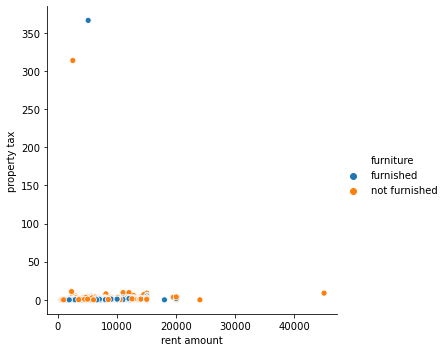

In [35]:
sns.relplot(x='rent amount', y='property tax', data=houses, hue='furniture')
plt.show()

# Method 2

In [38]:
file = r'C:\Users\Josè Valencia\Desktop\Thesis\houses_to_rent.csv'
file = 'houses_to_rent.csv'
# houses = pd.read_csv(file, sep=",|\$", engine='python')
houses = pd.read_csv(file, sep=",", na_values=['Incluso', 'Sem info'])
# Clean the last 5 columns
for i,col in enumerate(houses.columns[-5:]):
    print(col)
    rows = []
    for row in houses[col]:
        if not pd.isna(row):
            row = row.replace("R$", "")
            row = row.replace(",", "")
            rows.append(int(row))
        else:
            rows.append(row)
    houses[col] = rows

hoa
rent amount
property tax
fire insurance
total


In [39]:
houses

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0.0,8000,1000.0,121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540.0,820,122.0,11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172.0,7000,1417.0,89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700.0,1250,150.0,16,2116
4,4,1,19,1,1,0,-,not acept,not furnished,0.0,1200,41.0,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,420.0,1150,0.0,15,1585
6076,6076,1,84,2,2,1,16,not acept,furnished,768.0,2900,63.0,37,3768
6077,6077,0,48,1,1,0,13,acept,not furnished,250.0,950,42.0,13,1255
6078,6078,1,160,3,2,2,-,not acept,not furnished,0.0,3500,250.0,53,3803


In [27]:
from sklearn.datasets import load_boston

In [30]:
boston = load_boston()
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [32]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
boston.data[5]

array([2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
       6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
       1.8700e+01, 3.9412e+02, 5.2100e+00])